## Hypothesis 1: The Value of Style

**Hypothesis:** Artworks from certain styles consistently fetch higher average and median sale prices than works from other movements.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('avg_sale_price_per_style.csv')

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_92123/2085999362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_styles, y='style', x='avg_sale_price', palette='viridis', orient='h')


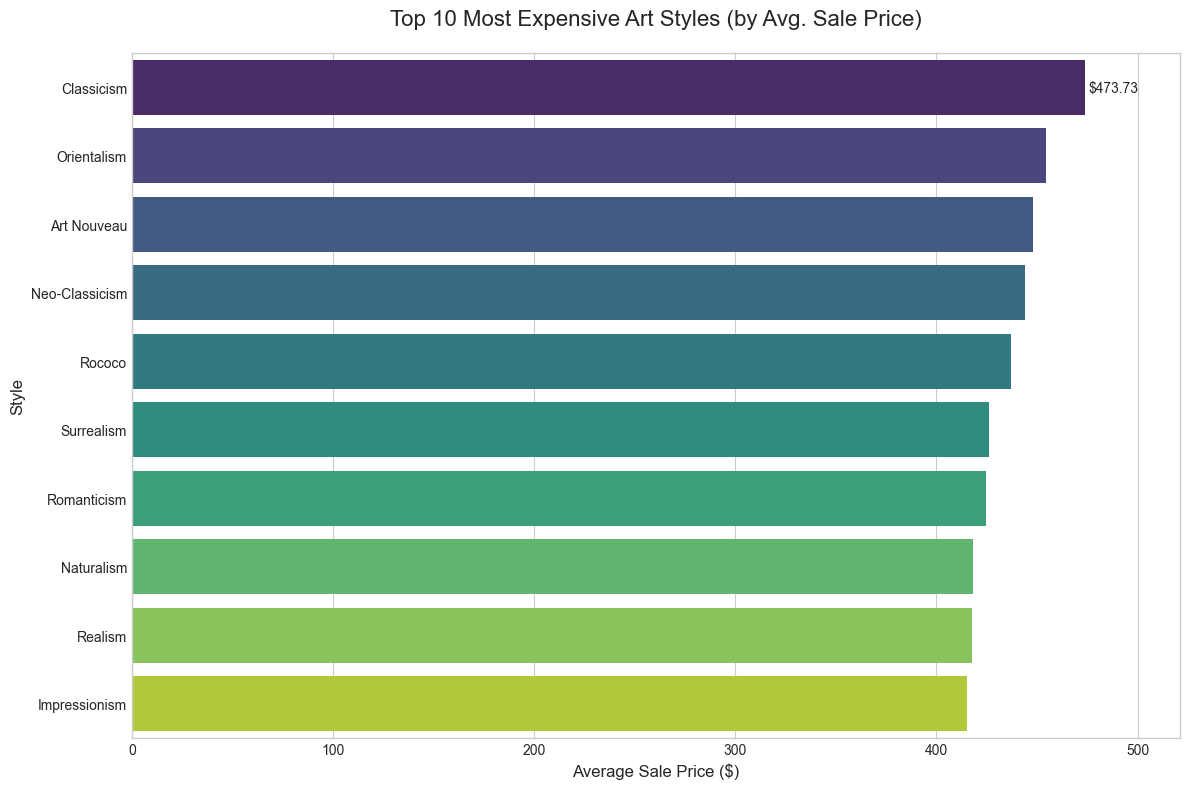

In [ ]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles, y='style', x='avg_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Avg. Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Average Sale Price ($)', fontsize=12)
ax.set_ylabel('Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles['avg_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()


In [9]:
df = pd.read_csv('median_sale_price_per_style.csv')

In [ ]:
data = {
    'style': ['Classicism', 'Japanese Art', 'Neo-Classicism', 'Art Nouveau', 'Naturalism', 'Romanticism', 'Symbolism', 'Cubism', 'Nabi', 'Pointillism'],
    'avg_sale_price': [473.73, 454.33, 448.02, 444.23, 437.28, 426.25, 424.48, 418.13, 417.89, 415.28]
}
df_top_styles = pd.DataFrame(data)

# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles, y='style', x='avg_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Avg. Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Average Sale Price ($)', fontsize=12)
ax.set_ylabel('Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles['avg_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()
